# Data labeling

As first step we analize the info that we have for this dataset and estimate the target variable based on descriptions and values.

In [1]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Download latest version
path = kagglehub.dataset_download("ethon0426/lending-club-20072020q1")

print("Path to dataset files:", path)

p = f"{path}/Loan_status_2007-2020Q3.gzip"


pd.set_option('display.max_columns', None)

df_borrowers = pd.read_csv(p)
print(len(df_borrowers))
df_borrowers.next_pymnt_d.unique()

Path to dataset files: /Users/ximeramos/.cache/kagglehub/datasets/ethon0426/lending-club-20072020q1/versions/3
2925493


array([nan, 'Jan-2016', 'Sep-2013', 'Feb-2016', 'Feb-2014', 'May-2014',
       'Jun-2013', 'Mar-2012', 'Apr-2012', 'May-2013', 'Aug-2012',
       'Aug-2013', 'Jun-2012', 'Nov-2013', 'Feb-2012', 'Oct-2011',
       'Jan-2013', 'Jan-2014', 'Jul-2013', 'Jul-2015', 'Jan-2012',
       'Dec-2012', 'Jun-2011', 'Feb-2013', 'Nov-2011', 'Nov-2012',
       'Dec-2011', 'Aug-2011', 'Sep-2011', 'Apr-2011', 'Mar-2014',
       'Apr-2013', 'Mar-2011', 'Jul-2012', 'Aug-2014', 'Oct-2013',
       'Sep-2012', 'May-2012', 'Apr-2015', 'Jul-2011', 'Dec-2015',
       'Dec-2013', 'Jan-2011', 'Oct-2012', 'Nov-2014', 'Mar-2013',
       'Aug-2015', 'Feb-2015', 'May-2015', 'Jul-2014', 'Nov-2015',
       'Sep-2014', 'Oct-2015', 'May-2011', 'Feb-2011', 'Dec-2014',
       'Jun-2015', 'Apr-2014', 'Jan-2015', 'Sep-2015', 'Jun-2014',
       'Nov-2010', 'Oct-2010', 'Dec-2010', 'Mar-2015', 'Oct-2014',
       'Jul-2010', 'Sep-2010', 'May-2010', 'Aug-2010', 'Mar-2010',
       'Jun-2010', 'Apr-2010', 'Feb-2010', 'Dec-2009', 'N

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
p = f"{path}/LCDataDictionary.xlsx"

df_descriptions = pd.read_excel(p)
df_descriptions

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


# Target variable definition

As we don't have the roll rates for loans to see the best past due to determine if a loan is good or bad, from description `loan_status` we can deduct this is a good variable to use as target. Let's see it's values:

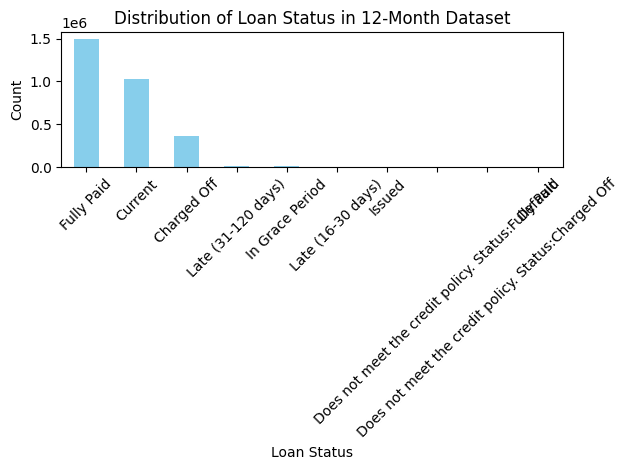

In [4]:
import matplotlib.pyplot as plt
# Count values and plot as barplot
df_borrowers['loan_status'].value_counts().plot(kind='bar', color='skyblue')

plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status in 12-Month Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This variable can be taken as the target, using the labels related to `charged off` to flag a loan as bad and the `fully paid` and `current` labels to mark a loan a not defaulter. To avoid noise, some labels  like `In Grace Period`, `Late (16-30 days)` and `Late (31-120 days)` can be used to flag the loan as indetermined.

Also we are going to take the loan with at least 12 months of lifetime (the common sandard on personal loans) to select the first group of loans to be modeled. As the databse doesn't have 'cuttof date' we are going to use as proxy of life of a credit `issue_d` and `last_pymnt_d` or `last_credit_pull_d`

Next, loans are going to be selected and labeled as defaulted or not based on previous criteria.

In [5]:
df = df_borrowers.copy()
for c in ['issue_d','last_pymnt_d','last_credit_pull_d']:
    df[c] = pd.to_datetime(df[c], errors='coerce')

# as-of for loan
as_of_row = df[['last_pymnt_d', 'last_credit_pull_d']].max(axis=1)
has_12m = (df['issue_d'] + pd.DateOffset(months=12)) <= as_of_row

default = {
    'Charged Off', 'Default',
    'Does not meet the credit policy: Status:Charged Off',
}
non_default = {
    'Fully Paid', 'Current',
    'Does not meet the credit policy: Status:Fully Paid',
}
indetermined = {'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)'}
policy_prefix = 'Does not meet the credit policy'

def label_row(s, has12):
    if pd.isna(s):
        return 'undetermined'
    if s in default:
        return 'default'
    if s in non_default and has12:
        return 'non_default'
    if (s in indetermined) or (s.startswith(policy_prefix) and s not in default and s not in non_default):
        return 'undetermined'

    return 'undetermined'

df['target'] = [label_row(s, h) for s, h in zip(df['loan_status'].fillna(''), has_12m)]

selected_loans_df = df[df['target'].isin(['default','non_default'])].copy()

In [6]:
len(selected_loans_df)

2366153

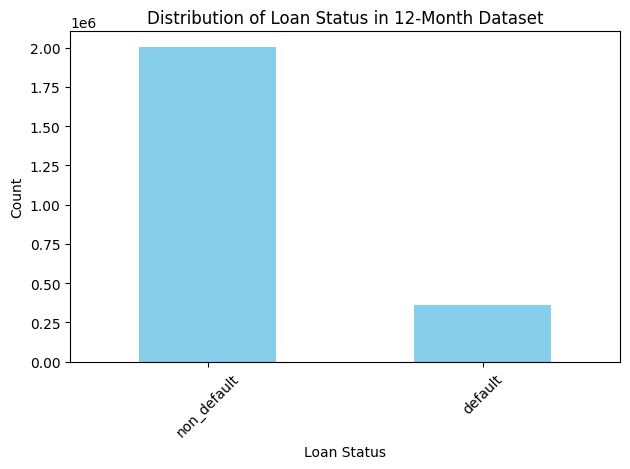

In [7]:
selected_loans_df['target'].value_counts().plot(kind='bar', color='skyblue')

plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status in 12-Month Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
df = selected_loans_df.copy()

# 1) Parse dates: 'Dec-2011' -> 2011-12-01
def parse_month(s):
    # Try %b-%Y
    out = pd.to_datetime(s, format='%b-%Y', errors='coerce')
    if pd.isna(out):
        out = pd.to_datetime(s, errors='coerce')
    return out

df['issue_d'] = df['issue_d'].astype(str).map(parse_month)

In [10]:
out = Path("data/processed")
out.mkdir(parents=True, exist_ok=True)
df.to_parquet(out / "total_df.parquet", engine="fastparquet", index=False)

In [11]:
out = Path("data/processed")
df = pd.read_parquet(out / "total_df.parquet", engine="fastparquet")

## Distribution of loans over time based on issue_d

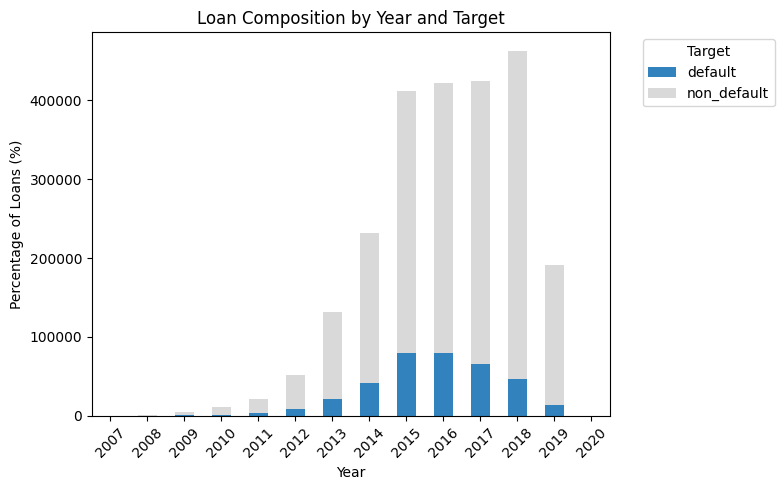

In [12]:
df['year'] = df['issue_d'].dt.year

loans_by_year_target = (
    df.groupby(['year', 'target'])
      .size()
      .unstack(fill_value=0)
      .sort_index()
)

# Plot stacked bar (100%)
loans_by_year_target.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='tab20c')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Percentage of Loans (%)')
plt.title('Loan Composition by Year and Target')
plt.xticks(rotation=45)
plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [13]:
print("Overall loan status distribution:")
print(df['target'].value_counts())
print(f"\nOverall default rate: {df['target'].map({'default': 1, 'non_default': 0}).mean():.2%}")

# Check by period
for year in [2015,2016, 2017, 2018, 2019]:
    year_data = df[df['issue_d'].dt.year == year]
    print(f"{year}: {len(year_data):,} loans, {year_data['target'].map({'default': 1, 'non_default': 0}).mean():.2%} default rate")

Overall loan status distribution:
target
non_default    2003172
default         362981
Name: count, dtype: int64

Overall default rate: 15.34%
2015: 412,318 loans, 19.33% default rate
2016: 421,884 loans, 18.74% default rate
2017: 423,795 loans, 15.63% default rate
2018: 462,928 loans, 10.20% default rate
2019: 190,890 loans, 7.11% default rate


For **train-test-oot** spliting lets use the info of issued loans from 2015 and 2019 as see see a high concentration of loan over those years. More years is also very useful to increase firness of a model.

In [14]:
from pathlib import Path

train = selected_loans_df[selected_loans_df['issue_d'].dt.year.isin([2016, 2017])].copy()
valid = selected_loans_df[(selected_loans_df['issue_d'] >= '2018-01-01') & 
                          (selected_loans_df['issue_d'] < '2018-07-01')].copy()
test = selected_loans_df[(selected_loans_df['issue_d'] >= '2018-07-01') & 
                         (selected_loans_df['issue_d'] < '2019-01-01')].copy()

print(f"Train:  {train['issue_d'].min()} → {train['issue_d'].max()} ({len(train):,} rows)")
print(f"Valid:  {valid['issue_d'].min()} → {valid['issue_d'].max()} ({len(valid):,} rows)")
print(f"Test:   {test['issue_d'].min()} → {test['issue_d'].max()} ({len(test):,} rows)")


train.to_parquet(out / "train.parquet", engine="fastparquet", index=False)
valid.to_parquet(out / "valid.parquet", engine="fastparquet", index=False)
test.to_parquet( out / "test.parquet",  engine="fastparquet", index=False)

print("Saved to:", list(out.glob("*.parquet")))

Train:  2016-01-01 00:00:00 → 2017-12-01 00:00:00 (845,679 rows)
Valid:  2018-01-01 00:00:00 → 2018-06-01 00:00:00 (225,005 rows)
Test:   2018-07-01 00:00:00 → 2018-12-01 00:00:00 (237,923 rows)
Saved to: [PosixPath('data/processed/train.parquet'), PosixPath('data/processed/test.parquet'), PosixPath('data/processed/valid.parquet'), PosixPath('data/processed/total_df.parquet')]


In [15]:
print(f"Train: {train['issue_d'].min()} to {train['issue_d'].max()}")
print(f"Valid: {valid['issue_d'].min()} to {valid['issue_d'].max()}")  
print(f"Test: {test['issue_d'].min()} to {test['issue_d'].max()}")

print(f"\ntrain size: {len(train):,} rows")
print(f"train default rate: {train['target'].map({'default': 1, 'non_default': 0}).mean():.2%}")

print(f"\nValid size: {len(valid):,} rows")
print(f"Valid default rate: {valid['target'].map({'default': 1, 'non_default': 0}).mean():.2%}")
print(f"\nTest size: {len(test):,} rows")
print(f"Test default rate: {test['target'].map({'default': 1, 'non_default': 0}).mean():.2%}")

Train: 2016-01-01 00:00:00 to 2017-12-01 00:00:00
Valid: 2018-01-01 00:00:00 to 2018-06-01 00:00:00
Test: 2018-07-01 00:00:00 to 2018-12-01 00:00:00

train size: 845,679 rows
train default rate: 17.19%

Valid size: 225,005 rows
Valid default rate: 12.05%

Test size: 237,923 rows
Test default rate: 8.45%
